# Lab 3: Partitioning

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.1


In [2]:
def plot_histogram(x):
    plt.figure(figsize=(18, 4))
    plt.title('Histogram')
    plt.xlabel('Key')
    plt.ylabel('# of occurence')
    plt.hist(x, bins=80)
    plt.show()

In [3]:
def obtain_logs(data):
    import csv
    
    with open(data + '/logs.csv') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        x = [row for row in rows]
        x = np.array(x).astype(np.int64)
        return x[:, 1:]

In [4]:
def obtain_schism_key_partition_pairs(data):
    import csv
    
    with open(data + '/schism.csv') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        x = [row for row in rows]
        x = np.array(x).astype(np.int64)
        return x.T

In [5]:
def calculate_dist_txs(keys, partitions, logs):
    total_dist_txs = 0
    for log in np.nditer(logs, flags=['external_loop']):
        sel = np.zeros([len(keys)], dtype=bool)
        for k in np.nditer(log):
            s = (keys == k)
            sel = np.logical_or(sel, s)
        partition_log = partitions[sel]
        if len(np.unique(partition_log)) != 0:
            total_dist_txs = total_dist_txs + len(np.unique(partition_log)) - 1
    return total_dist_txs

In [6]:
def calculate_loading(keys, partitions, logs):
    n_accesses = np.zeros(5)
    n_partition = np.amax(partitions) + 1
    logs = logs.flatten()
    
    accesses_all = np.array([])
    for k in np.nditer(logs):
        sel = (keys == k)
        partition_log = partitions[sel]
        accesses_all = np.append(accesses_all, partition_log)
    accesses_partition = []
    for p in range(n_partition):
        accesses_partition.append(len(accesses_all[accesses_all == p]))
    return accesses_partition

## Obtain the workload

<img src="workload.png" alt="drawing" width="400"/>

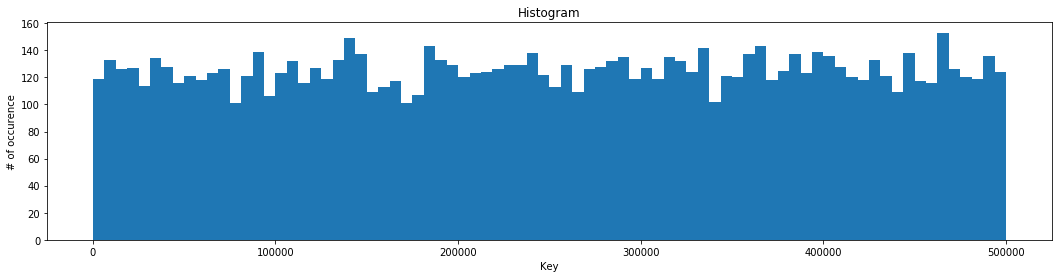

In [7]:
data = 'uniform-range'
#data = 'zipfian-range'
#data = 'zipfian-little-dist'
logs = obtain_logs(data)
logs = logs[0:5000]
plot_histogram(logs.flatten())

## Partition with Schism

<img src="partition-table.png" alt="drawing" width="300"/>

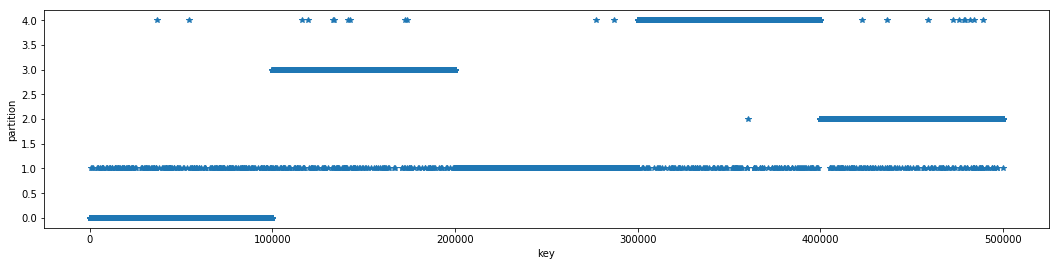

In [8]:
keys, partitions = obtain_schism_key_partition_pairs(data)
plt.figure(figsize=(18, 4))
plt.xlabel('key')
plt.ylabel('partition')
plt.plot(keys, partitions, linestyle='None', marker='*')
plt.show()

## Evaluate the partitioning results

In [9]:
n_dist_txs = calculate_dist_txs(keys, partitions, logs)
print('Number of distributed transactions:')
print(n_dist_txs)
accesses_partition = calculate_loading(keys, partitions, logs)
print('Number of accesses in each partition:')
print(accesses_partition)

Number of distributed transactions:
0
Number of accesses in each partition:
[1952, 2002, 2014, 1988, 2044]
